# CSE527 Homework 1 (part 2)
**Due date: 11:59 pm on Sep 22, 2024 (EST)**

In this semester, we will use Google Colab for the assignments, which allows us to utilize resources that some of us might not have in their local machines such as GPUs. You will need to use your Stony Brook (*.stonybrook.edu) account for coding and Google Drive to save your results.

## Google Colab Tutorial
---
Go to https://colab.research.google.com/notebooks/, you will see a tutorial named "Welcome to Colaboratory" file, where you can learn the basics of using google colab.

Settings used for assignments: ***Edit -> Notebook Settings -> Runtime Type (Python 3)***.

## Setup Environment
---







## Problem 2: Replacing Poster with a Painting
#### Description
----
In this problem, you will replace a CEWIT poster in a scene image with a template image (i.e. a painting of aquarium), using homography transformation.

In [1]:
# import packages here
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

print(cv.__version__) # verify OpenCV version

# figure and show
def imshow(im, title=None):
    plt.figure(figsize=(18, 6))
    plt.imshow(cv.cvtColor(im, cv.COLOR_BGR2RGB))
    if title is not None:
        plt.title(title)
    plt.axis("off")
    plt.show()

4.10.0


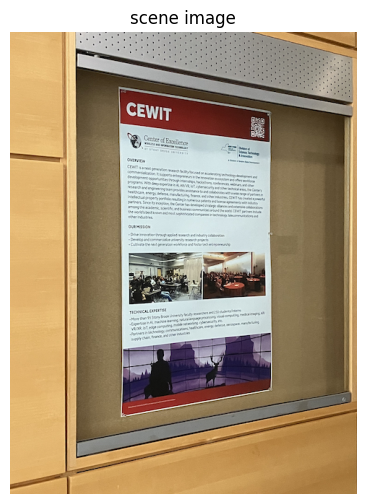

In [2]:
# read in the scene image and display
scene_img = cv.imread('source_images/poster.jpg')
imshow(scene_img, 'scene image')

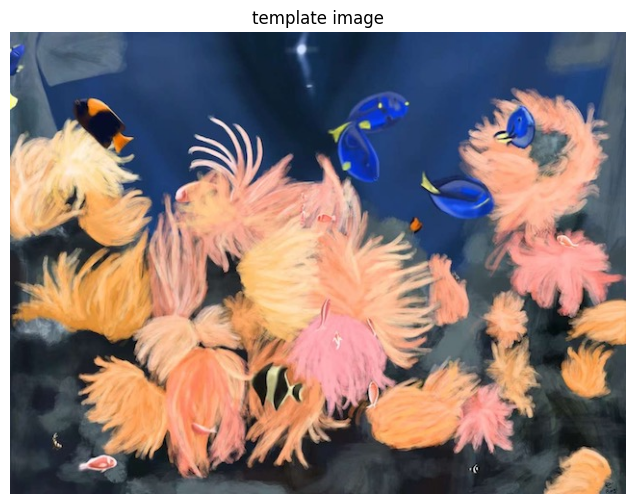

In [3]:
# read in the template image
template_img = cv.imread("source_images/painting.jpg")
imshow(template_img, 'template image')

### Part 1: select four points
(5 points) In this part, you need to provide the coordinates of the four corners of the CEWIT poster in the scene image.

You do not need to provide the process of how you get the coordinates. You can use whatever approach (including manual measure it in Photoshop).

The provided visualization codes will display your selection as red points, to help you verify your results.

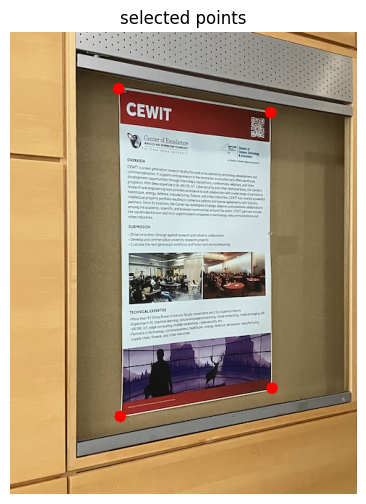

In [4]:
##########--WRITE YOUR CODE HERE--##########

# select four points (x, y)
select_pts = [[150, 78], [152, 532], [360, 111], [362, 493]]


##########-------END OF CODE-------##########

# visualize the selected four points in red
viz_img = scene_img.copy()
for i in range(4):
    viz_img = cv.circle(viz_img, select_pts[i], radius=8, color=(0, 0, 255), thickness=-1)
imshow(viz_img, 'selected points')

### Part 2: Estimate the homography
(15 points) In this part, you need to estimate the homography **from the scene image to the template image**.

In [5]:
# estimate the homography from the scene image to the template image geometry estimation
def estimate_homograph(sel_pts, temp_img):
    ##########--WRITE YOUR CODE HERE--##########

  # Points to estimate homography
  sel_pts = sorted(sel_pts)
  temp_pts = [
      [0, 0],
      [0, temp_img.shape[0]],
      [temp_img.shape[1], 0],
      [temp_img.shape[1], temp_img.shape[0]]
  ]
  temp_pts = sorted(temp_pts)

  # # Creating system of equations to solve for h
  # X = []
  # Y = []
  # for i in range(4):
  #     pt2 = sel_pts[i]
  #     pt1 = temp_pts[i]
  #     comp1 = np.array([*pt1, 1])
  #     A = np.concatenate((comp1, np.zeros(3), np.array([-pt2[0]*pt1[0], -pt2[0]*pt1[1]])), 0)
  #     B = np.concatenate((np.zeros(3), comp1, np.array([-pt2[1]*pt1[0], -pt2[1]*pt1[1]])), 0)
  #     Xi = np.stack((A, B))
  #     Yi = np.array([[pt2[0]], [pt2[1]]])
  #     X.append(Xi)
  #     Y.append(Yi)
  # # X @ h = Y
  # X = np.concatenate(X, 0)
  # Y = np.concatenate(Y, 0)
  # h = np.linalg.inv(X) @ Y
  # # h(8, 1) -> H(3, 3)
  # h = np.concatenate((h, np.eye(1,1)))
  # homo_matrix = h.reshape(3, 3)

  # Using cv library to find homography
  homo_matrix = cv.findHomography(np.array(temp_pts), np.array(sel_pts))[0]

  ##########-------END OF CODE-------##########
  return homo_matrix

H = estimate_homograph(select_pts, template_img)
print(f"homograph matrix from scene image to template image: \n{H}")

homograph matrix from scene image to template image: 
[[ 4.34042956e-01  3.59878204e-03  1.50000000e+02]
 [ 8.42205363e-02  9.43845737e-01  7.80000000e+01]
 [ 2.94216543e-04 -3.73608309e-06  1.00000000e+00]]


### Part 3: Replace the poster in the scene
(15 points) In this part, you need to replace the CEWIT poster in the scene image with the template painting, based on the homography matrix you have estimated in Part 2.

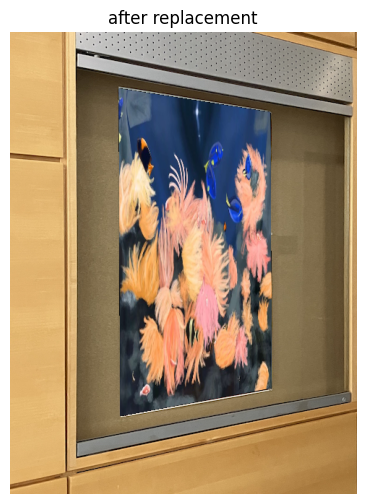

True

In [6]:
def replace(src_img, tgt_img, homo_matrix):
  ##########--WRITE YOUR CODE HERE--##########

  # Using cv library to wrap src_img (template img) for given homo_matrix
  warped_src_img = cv.warpPerspective(src_img, homo_matrix, (tgt_img.shape[1], tgt_img.shape[0]))

  # Creating masks
  src_mask = np.zeros_like(warped_src_img, dtype=np.uint8)
  src_mask[warped_src_img > 0] = 255
  tgt_mask = cv.bitwise_not(src_mask)

  # Combine images
  tgt_img_part = cv.bitwise_and(tgt_img, tgt_img, mask=tgt_mask[:, :, 0])
  src_img_part = cv.bitwise_and(warped_src_img, warped_src_img, mask=src_mask[:, :, 0])

  # Final image
  result = cv.add(tgt_img_part, src_img_part)

  ##########-------END OF CODE-------##########
  return result

new_img = replace(template_img, scene_img, H) # Changed arguments here

imshow(new_img, 'after replacement')
cv.imwrite('results/result.png', new_img)